---
Multiple Linear Regression
---


## Case

We are going to help a company to optimize their advertisement strategy. They spend money on advertisement for different media channels: TV, radio and newspaper - and wants to know which channel is the most most effective.

**Task:**

- suggest marketing plan to increase sales units
- use linear regression to predict sales based on different spendings on different marketing channels

---

### Initial EDA - Exploratory Data Analysis

The dataset for this lecture comes from ISLR - Introduction to Statistical Learning. The dataset used is [Advertising.csv](https://www.kaggle.com/ishaanv/ISLR-Auto)

Units:

- TV, radio, newspaper - thousands dollars
- Sales - thousands units


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/advertising.csv", index_col=0)


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Insights via plots**

 Let's do some scatterplots, one for each feature vs the target.

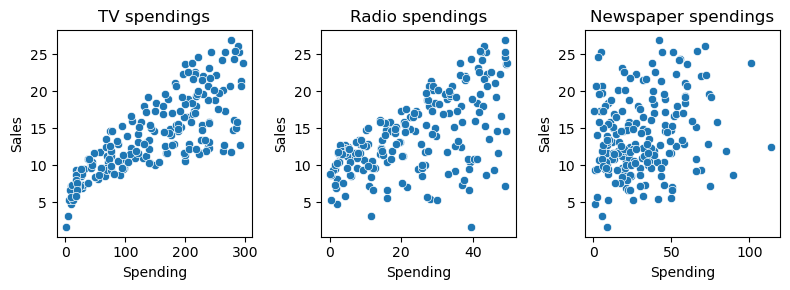

In [3]:
number_features = df.shape[1] - 1
fig, ax = plt.subplots(1, number_features, figsize=(8, 3), dpi=100)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x=feature, y="Sales", ax=ax[i])
    ax[i].set(xlabel="Spending", title=f"{feature} spendings")

fig.tight_layout()


c:\Users\Leyla\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Leyla\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Leyla\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Leyla\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

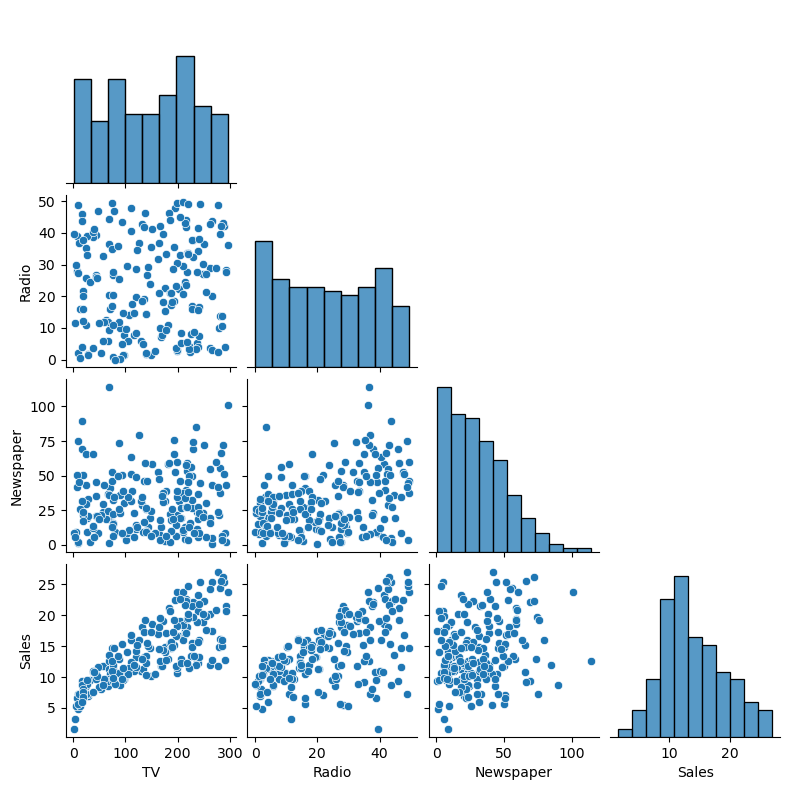

In [4]:
# plot pairwise relationships in a df
ax = sns.pairplot(df, corner=True, height=2)
# set corner to True as upper right mirrors the corner, this saves computations


---

## Muliple linear regression

As with simple linear regression, multiple linear regression is also supervised learning algorithm - the predicted output is continuous. 

The difference from linear regression is that we now have several feature (predictor) variables. In the case of 3 features, a multiple linear regression model with one feature variable looks like this:

$f_{w,b}(x) = w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + b$.

We done the output of the model $\hat{y}$. In other words, we have

$\hat{y}^{i} = w_1 \cdot x_1^{i} + w_2 \cdot x_2^{i} + w_3 \cdot x_3^{i} + b$.

The parameters of our model are unknown and needs to be estimated using our training data points $(x^1_1, x^1_2, x^1_3, y^1), (x^2_1, x^2_2, x^2_3, y^2), \ldots, (x^m_1, x^m_2, x^m_3, y^m)$.

---

Taking a look at the data

In [19]:
x_1, x_2, x_3 , y = df["TV"].values, df["Radio"].values, df["Newspaper"].values, np.array(df["Sales"].values)


In [21]:
# change the index below to see the features and target for training sample i

i = 2

print(f'Sample {i+1} feature x_1 : {x_1[i]}')
print(f'Sample {i+1} feature x_2 : {x_2[i]}')
print(f'Sample {i+1} feature x_3 : {x_3[i]}')
print(f'Sample {i+1} target  y   : {y[i]}')

Sample 3 feature x_1 : 17.2
Sample 3 feature x_2 : 45.9
Sample 3 feature x_3 : 69.3
Sample 3 target  y   : 9.3


---

## Multiple linear regression

We used numpy polyfit to estimate the parameters for a simple linear regression using the the TV-feature alone. However, polyfit only supports one feature. 

We want to use more than one feature now. In this case three of them (TV, radio, newspaper) and use that to predict sales.

One way is to manually solve the **normal equation** or the **closed form equation**: $\bf{w} = (\bf{X}^T\bf{X})^{-1}\bf{X}^T\bf{y}$ using linear algebra.


$$\bf{X} = 	\begin{bmatrix} 
	1 & x_1^{1} & x_2^{1}& \ldots &x_n^{1} \\
	1 & x_1^{2} & x_2^{2}& \ldots &x_n^{2}\\
	\vdots & \vdots & \vdots & \ddots & \vdots\\
	1 & x_1^{m}& x_2^{m}& \ldots &x_n^{m}
\end{bmatrix}, \bf{y} = \begin{bmatrix} 
y^1 \\ y^2 \\ \vdots \\ y^m
\end{bmatrix}, \bf{w} = \begin{bmatrix} 
w_0 \\w_1\\ \vdots \\ w_n
\end{bmatrix}$$

Note that we have an additional $w_0$ as the first element of $\bf{w}$, but this is just for notation. In practice, $w_0$ serves the same purpose as $b$.

In our example we have $n = 3$ features, $m = 200$ samples, which gives us the regression coefficients $w_0, w_1, w_2, w_3$ to estimate.

The regression line is thus 

$$f_{\bold{w}}(\bold{{x}}) = w_0 + w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3$$ 

With this equation we can predict the sale for a new sample $i$ by 
$$\hat{y}^{(i)} = w_0 + w_1 \cdot x_1^{(i)} + w_2 \cdot x_2^{(i)} + w_3 \cdot x_3^{(i)}$$ 

or using dot product 
	$$\hat{y}^i = \bf{w}\cdot\bf{x}^{(i)}$$

where $\bf{x}^{(i)}$ = $[1, x_1^{(i)}, x_2^{(i)},x_3^{(i)} ]$


In [36]:
# let's prepare our data like this

X, y = df.drop("Sales", axis="columns"), df["Sales"]
X.insert(0, "Intercept", 1)

X

,Intercept,TV,Radio,Newspaper
1,1,230.1,37.8,69.2
2,1,44.5,39.3,45.1
3,1,17.2,45.9,69.3
4,1,151.5,41.3,58.5
5,1,180.8,10.8,58.4
...,...,...,...,...
196,1,38.2,3.7,13.8
197,1,94.2,4.9,8.1
198,1,177.0,9.3,6.4
199,1,283.6,42.0,66.2


In [37]:
# now we implement the closed form solution to obtain the weights

weights = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)),X.T), y)

for i, weight in enumerate(weights):
    print(f'w_{i}: {weight}')

w_0: 2.938889369459393
w_1: 0.04576464545539761
w_2: 0.188530016918205
w_3: -0.0010374930424763358


---
## Prediction

Let's now use our model to predict some values $\hat{y}$, and compare them with the true values $y$ found in the training data

We will obtain $\hat{y}^i$ using the dot product
 $$\hat{y}^i = \bf{w}\cdot\bf{x}^{(i)}$$


In [43]:
X.iloc[100]

Intercept      1.0
TV           222.4
Radio          4.3
Newspaper     49.8
Name: 101, dtype: float64

In [48]:
i = 30                  # change this to whichever training sample index you like 

y_hat = np.dot(weights, X.iloc[i])

print(f'y_hat = {y_hat}')
print(f'y     = {y[i]}')

y_hat = 21.633933802695573
y     = 10.5


---
## Challenges

**Task 1**

Calculate MAE for the model we just fit. Is it better or worse at predicting sales numbers compared with the linear and polynomial regression models we fit using a single feature of the data?

**Task 2**

Nothing stop you from creating your own new features, and in turn using them as predictor variables in a multiple linear regression model. For example, we could combine the features TV and Newspaper by multiplying them and call this new feature $x_4$, as such:

$$x_4 = TV \cdot Newspaper$$

We can then use this as another feature for our model. In fact, we can pick and chose exactly which features we want to use in our model, and which to exclude. 

For example, we could do something like this

$$f_{\bold{w}}(\bold{{x}}) = w_0 + w_1 \cdot x_1 + w_2 \cdot x_4$$

The point is that you can create your own features as you like, and then pick and chose exactly which features to include in your model. Usually, this process is not random but informed by domain expertise about the data and the exact process we're trying to model.

Your task now is to experiment with this. Create your own feature(s) and then use it/them as features for your multiple regression model. If you like, you can do exactly as we've done above. After you've fit the model, calculate the MAE. Is it better or worse than our original multiple regression model?


---

Solution Task 1

In [62]:
def MAE(y_true, y_predictions):

    '''Calculates the Mean Absolute Error between true values y and predicted y_hat'''
    
    initial_sum = sum([np.abs(y-y_hat) for y, y_hat in zip(y_true, y_predictions)])

    mae = initial_sum/len(y_true)

    mae_rounded = round(mae, 4)

    return mae_rounded

In [64]:
# calculate all our predictions for each training sample

y_hats = np.dot(X, weights)

# compare with ground truth and calculate MAE

MAE(y, y_hats)

1.252